In [1]:
import os
from time import time
import multiprocessing
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas

In [ ]:
# ds = xr.open_dataset('data/processed/range-pd-sync3.nc')

In [ ]:
# ds['pd'] = ds.pd.assign_attrs(units='$Wm^{-2}$')
# ds['pd'] = ds.pd.assign_attrs(long_name='power density')
# ds['lat'] = ds.lat.assign_attrs(units='degrees')
# ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
# ds['lon'] = ds.lon.assign_attrs(units='degrees')
# ds['lon'] = ds.lon.assign_attrs(long_name='longitude')

In [ ]:
# ds.to_netcdf(path=f'data/processed/range-pd-sync3-1.nc')

In [2]:
ds = xr.open_dataset('data/processed/range-pd-sync4.nc')

In [3]:
time = ds.time.values[::10]
power = ds.pd.values
power = power[power>0]
lim = np.max(power[::10])

In [4]:
count = 0
for t in time:
    count += 1
    name = str(count)
    target_time = t 
    ds.pd.sel(time=target_time,method='nearest').plot(size=10,aspect=1,cmap='magma',vmax=lim)
    if len(name) == 1:
        plt.savefig(f'figures/range-gif/frame000{count}.png')
    elif len(name) == 2:
        plt.savefig(f'figures/range-gif/frame00{count}.png')
    elif len(name) == 3:
        plt.savefig(f'figures/range-gif/frame0{count}.png')
    plt.close()


In [4]:
ds = xr.open_dataset('data/processed/stream-coarse-pd2.nc')

In [5]:
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (time: 672, depth: 1, lat: 519, lon: 232)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-02 ... 2020-01-29T23:00:00
  * depth    (depth) float32 20.0
  * lat      (lat) float32 48.0 48.03 48.05 48.08 ... 61.92 61.95 61.97 62.0
  * lon      (lon) float32 -10.0 -9.939 -9.879 -9.818 ... 3.818 3.879 3.939 4.0
Data variables:
    pd       (time, depth, lat, lon) float32 ...>

In [ ]:
# ds = ds.assign(speed=lambda ds: np.sqrt((ds.uo)**2 + (ds.vo)**2))



# rho = 1025 # sea water density
# A = 1
# Cp = 1

# ds = ds.assign(pd=lambda ds: 0.5*Cp*rho*A*(ds.speed**3))

In [ ]:
# ds = ds[['pd']].sel(time=slice('2020-01-02','2020-01-29T23:59:59.000000000'))

In [6]:
ds['pd'] = ds.pd.assign_attrs(units='$Wm^{-2}$')
ds['pd'] = ds.pd.assign_attrs(long_name='power density')
ds['lat'] = ds.lat.assign_attrs(units='degrees')
ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
ds['lon'] = ds.lon.assign_attrs(units='degrees')
ds['lon'] = ds.lon.assign_attrs(long_name='longitude')
ds['depth'] = ds.depth.assign_attrs(units='m')

In [7]:
# ds.to_netcdf(path=f'data/processed/stream-coarse-pd2-1.nc')

In [8]:
ds = xr.open_dataset('data/processed/stream-coarse-pd2-1.nc')

In [17]:
time = ds.time.values[::3]
power = ds.pd.values
power = power[power>0]
lim = np.max(power[::3])

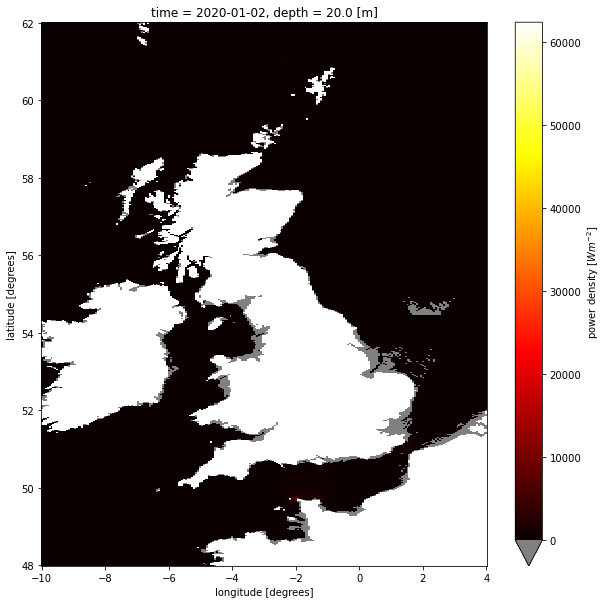

In [15]:
cmap = mpl.cm.get_cmap('hot').copy()
cmap.set_under('gray')

target_time = '2020-01-02T00:00:00.000000000' 
ds.pd.sel(time=target_time,method='nearest').plot(size=10,aspect=1,vmin=0,cmap=cmap)  

In [18]:
# cmap = mpl.cm.get_cmap('hot').copy()
# cmap.set_under('gray')




# count = 0
# for t in time:
#     count += 1
#     name = str(count)
#     target_time = t 
#     ds.pd.sel(time=target_time,method='nearest').plot(size=10,aspect=1,vmin=0,vmax=lim,cmap=cmap)
#     if len(name) == 1:
#         plt.savefig(f'figures/stream-gif/frame000{count}.png')
#     elif len(name) == 2:
#         plt.savefig(f'figures/stream-gif/frame00{count}.png')
#     elif len(name) == 3:
#         plt.savefig(f'figures/stream-gif/frame0{count}.png')
#     plt.close()


In [2]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values
ga_21_1 = np.zeros((51,uk.shape[0],uk.shape[1]))

for i in range(51):
    ga_21_1[i,:,:] = uk
    
for j in range(51): 
    df = pandas.read_csv(f'data/processed/ga-results-21/run-1-gen-{j}.csv')
    for k in range(len(df)):
        ga_21_1[j,df.iloc[k]['lat_index'],df.loc[k]['lon_index']] = 10

placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=ga_21_1,
        coords={'gen':np.arange(51),
                'lat': ds.lat.values,
                'lon': ds.lon.values},
        dims=['gen','lat','lon'])})


placement_xr['gen'] = placement_xr.gen.assign_attrs(long_name='generation')
placement_xr['lat'] = placement_xr.lat.assign_attrs(units='degrees')
placement_xr['lat'] = placement_xr.lat.assign_attrs(long_name='latitude')
placement_xr['lon'] = placement_xr.lon.assign_attrs(units='degrees')
placement_xr['lon'] = placement_xr.lon.assign_attrs(long_name='longitude')

placement_xr.to_netcdf(path=f'data/processed/ga-21-1-gen.nc')

In [3]:
ds = xr.open_dataset('data/processed/ga-21-1-gen.nc')

In [4]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')



for g in ds.gen.values:
   
    name = str(g)
    ds.placement.sel(gen=g).plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)
    if len(name) == 1:
        plt.savefig(f'figures/ga-21-1/frame00{g}.png')
    elif len(name) == 2:
        plt.savefig(f'figures/ga-21-1/frame0{g}.png')
    
    plt.close()



In [2]:
ds = xr.open_dataset('data/raw/range-2020-01-01-15.nc')

In [3]:
ds['lat'] = ds.lat.assign_attrs(units='degrees')
ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
ds['lon'] = ds.lon.assign_attrs(units='degrees')
ds['lon'] = ds.lon.assign_attrs(long_name='longitude')
ds['zos'] = ds.zos.assign_attrs(long_name='sea surface height above geoid')

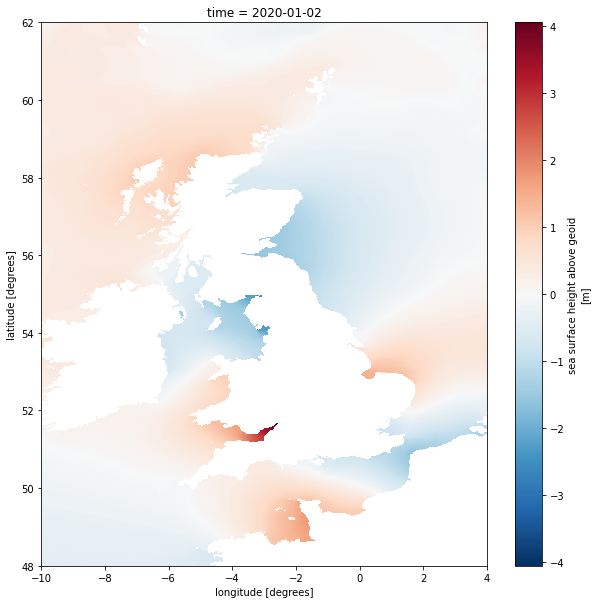

In [4]:
target_time = '2020-01-02T00:00:00.000000000'
ds.zos.sel(time=target_time,method='nearest').plot(size=10,aspect=1)  
# plt.savefig('figures/for-report/elevation-map.png')

In [5]:
ds = xr.open_dataset('data/raw/stream-2020-01.nc')

In [6]:
ds = ds.assign(speed=lambda ds: np.sqrt((ds.uo)**2 + (ds.vo)**2))

In [7]:
uo = ds.uo.values
vo = ds.vo.values
speed = ds.speed.values

In [8]:
ds_r = xr.open_dataset('data/raw/range-2020-01-01-15.nc')
uk = ds_r.zos.values[0,:,:]
latitude = ds_r.lat.values
longitude = ds_r.lon.values

In [9]:
for j in range(len(latitude)):
    for k in range(len(longitude)):
        if np.isnan(uk[j,k]) == True:
            pass
        else:
            uk[j,k] = 0

In [10]:
for j in range(len(latitude)):
    for k in range(len(longitude)):
        
        if uk[j,k] == 0 and np.isnan(uo[0,0,j,k]) == True:
            uo[:,:,j,k] = -20
            vo[:,:,j,k] = -20
            speed[:,:,j,k] = -20
            
            

In [11]:
uo = xr.Dataset({
    'uo': xr.DataArray(
        data=uo,
        coords={'time': ds.time.values,
                'depth': ds.depth.values,
                'lat': latitude,
                'lon': longitude},
        dims=['time','depth','lat','lon'])})
        

In [12]:
vo = xr.Dataset({
    'vo': xr.DataArray(
        data=vo,
        coords={'time': ds.time.values,
                'depth': ds.depth.values,
                'lat': latitude,
                'lon': longitude},
        dims=['time','depth','lat','lon'])})
        

In [13]:
speed = xr.Dataset({
    'speed': xr.DataArray(
        data=speed,
        coords={'time': ds.time.values,
                'depth': ds.depth.values,
                'lat': latitude,
                'lon': longitude},
        dims=['time','depth','lat','lon'])})
        

In [14]:
uo['lat'] = uo.lat.assign_attrs(units='degrees')
uo['lat'] = uo.lat.assign_attrs(long_name='latitude')
uo['lon'] = uo.lon.assign_attrs(units='degrees')
uo['lon'] = uo.lon.assign_attrs(long_name='longitude')
uo['uo'] = uo.uo.assign_attrs(units='ms$\mathdefault{^{-1}}$')
uo['uo'] = uo.uo.assign_attrs(long_name='eastward current velocity in the water column at a depth of 20m')

vo['lat'] = vo.lat.assign_attrs(units='degrees')
vo['lat'] = vo.lat.assign_attrs(long_name='latitude')
vo['lon'] = vo.lon.assign_attrs(units='degrees')
vo['lon'] = vo.lon.assign_attrs(long_name='longitude')
vo['vo'] = vo.vo.assign_attrs(units='ms$\mathdefault{^{-1}}$')
vo['vo'] = vo.vo.assign_attrs(long_name='northward current velocity in the water column at a depth of 20m')

speed['lat'] = speed.lat.assign_attrs(units='degrees')
speed['lat'] = speed.lat.assign_attrs(long_name='latitude')
speed['lon'] = speed.lon.assign_attrs(units='degrees')
speed['lon'] = speed.lon.assign_attrs(long_name='longitude')
speed['speed'] = speed.speed.assign_attrs(units='ms$\mathdefault{^{-1}}$')
speed['speed'] = speed.speed.assign_attrs(long_name='current speed at a depth of 20m')

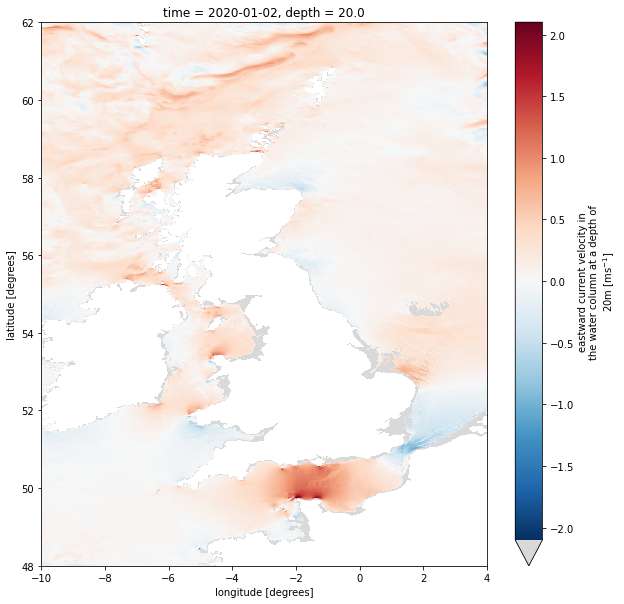

In [15]:
cmap = mpl.cm.get_cmap('RdBu_r').copy()
cmap.set_under('#d9d9d9')
target_time = '2020-01-02T00:00:00.000000000'
uo.uo.sel(time=target_time,method='nearest').plot(size=10,vmin=-2.1,aspect=1,cmap=cmap)
# plt.savefig('figures/for-report/uo-map.png')

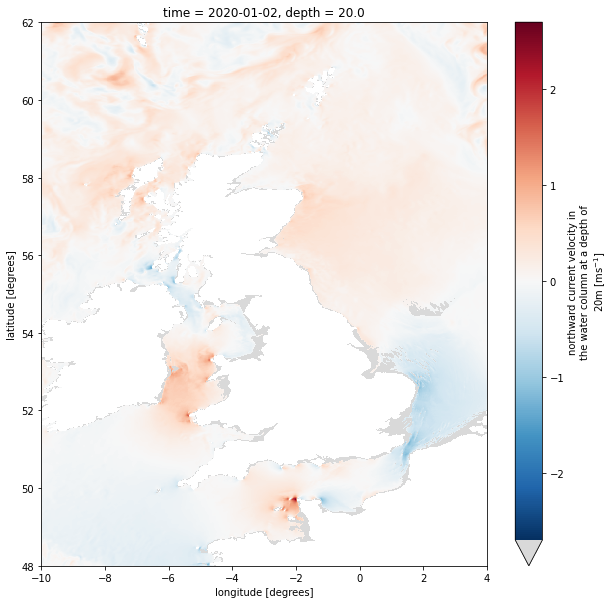

In [16]:
cmap = mpl.cm.get_cmap('RdBu_r').copy()
cmap.set_under('#d9d9d9')
# cmap.set_bad('#e6ffcc')
target_time = '2020-01-02T00:00:00.000000000'
vo.vo.sel(time=target_time,method='nearest').plot(size=10,vmin=-2.7,aspect=1,cmap=cmap)
# plt.savefig('figures/for-report/vo-map.png')

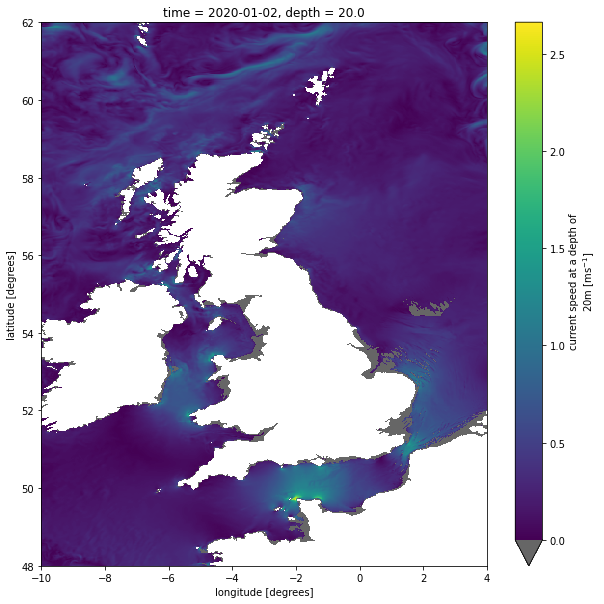

In [17]:
cmap = mpl.cm.get_cmap('viridis').copy()
cmap.set_under('#666666')
target_time = '2020-01-02T00:00:00.000000000'
speed.speed.sel(time=target_time,method='nearest').plot(size=10,vmin=0,aspect=1,cmap=cmap)
# plt.savefig('figures/for-report/speed-map.png')

In [18]:
speed.speed.values.shape

(744, 1, 1037, 463)

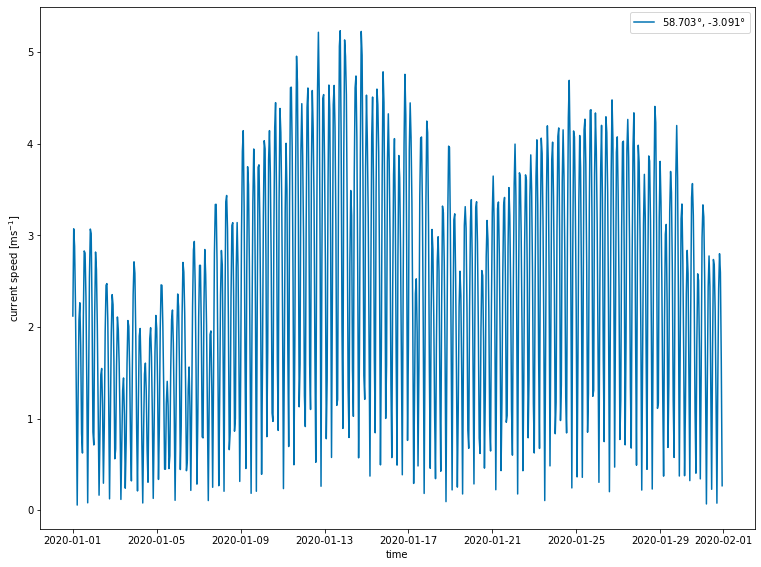

In [28]:
lat = 58.7027
latitude_idx = np.where(speed.lat.values==lat)[0][0]
lon = -3.0909090
longitude_idx = np.where(speed.lon.values==lon)[0][0]

plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(ds.time.values,speed.speed.values[:,:,latitude_idx,longitude_idx],label='58.703$\degree$, -3.091$\degree$')
plt.xlabel('time')
plt.ylabel('current speed [ms$\mathdefault{^{-1}}$]')
plt.legend()
# plt.savefig('figures/for-report/speed-pentlandfirth.png')

In [29]:
range_jan = xr.open_mfdataset('data/raw/range-2020-01-*.nc',combine='by_coords')

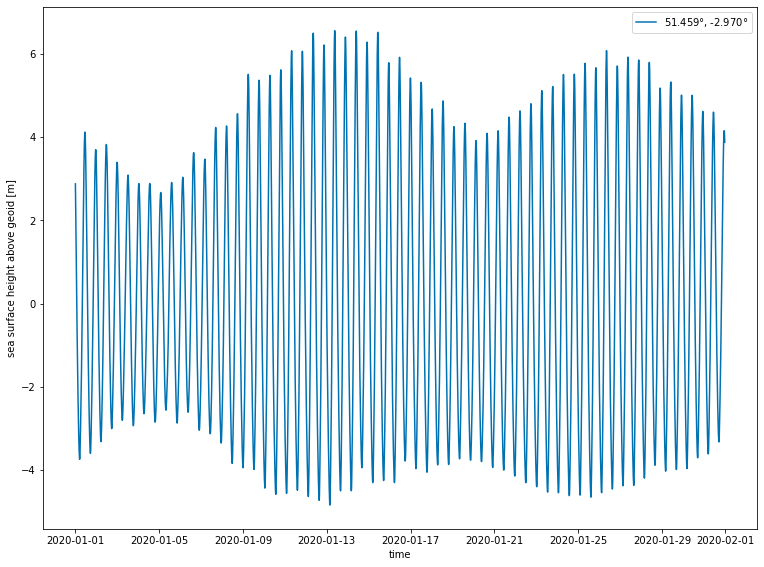

In [38]:
lat = 51.45946
latitude_idx = np.where(range_jan.lat.values==lat)[0][0]
lon = -2.9696970
longitude_idx = np.where(range_jan.lon.values==lon)[0][0]

plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(range_jan.time.values,range_jan.zos.values[:,latitude_idx,longitude_idx],label='51.459$\degree$, -2.970$\degree$')
plt.xlabel('time')
plt.ylabel('sea surface height above geoid [m]')
plt.legend()
# plt.savefig('figures/for-report/elevation-severnestuary.png')

In [93]:
ds_range = xr.open_dataset('data/processed/range-pd-sync4.nc')
ds_stream = xr.open_dataset('data/processed/stream-pd-int2.nc')
ds_range_pow = xr.open_dataset('data/processed/range-power.nc')
ds_stream_pow = xr.open_dataset('data/processed/stream-power.nc')

In [42]:
ds_range['pd'] = ds_range.pd.assign_attrs(units='Wm$\mathdefault{^{-2}}$')

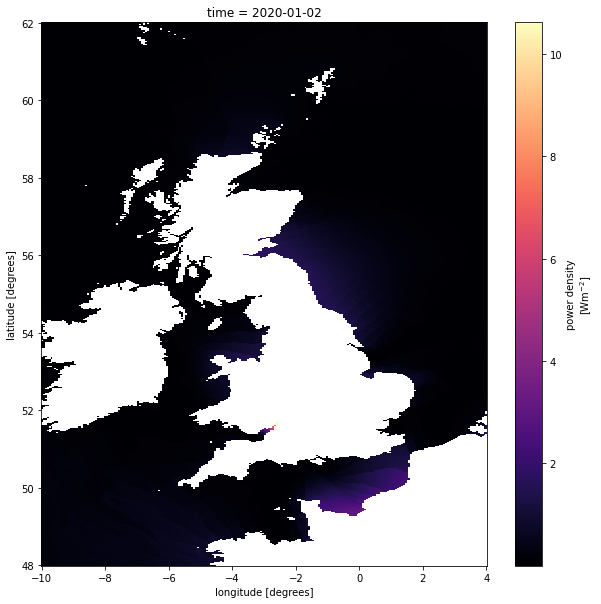

In [44]:
target_time = '2020-01-02T00:00:00.000000000'  
ds_range.pd.sel(time=target_time,method='nearest').plot(size=10,aspect=1,cmap='magma') 
# plt.savefig('figures/for-report/range-pd-map.png')

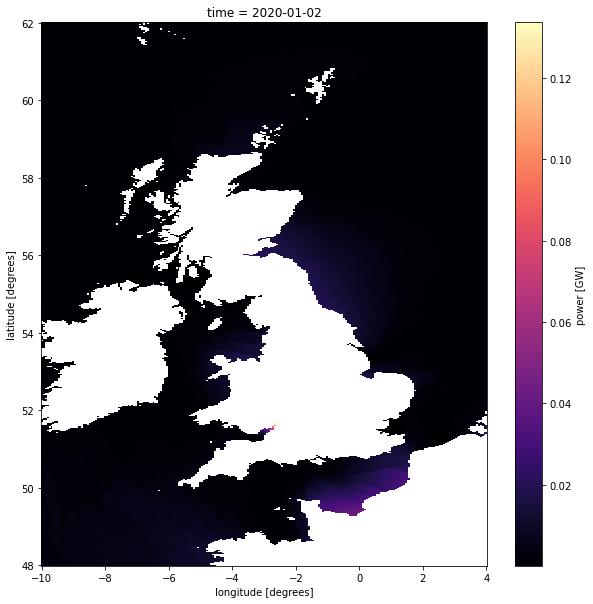

In [62]:
ds_range_pow.power.values = ds_range_pow.power.values/1e9
ds_range_pow['power'] = ds_range_pow.power.assign_attrs(units='GW')
target_time = '2020-01-02T00:00:00.000000000'  
ds_range_pow.power.sel(time=target_time,method='nearest').plot(size=10,aspect=1,cmap='magma') 
# plt.savefig('figures/for-report/range-power-map.png')

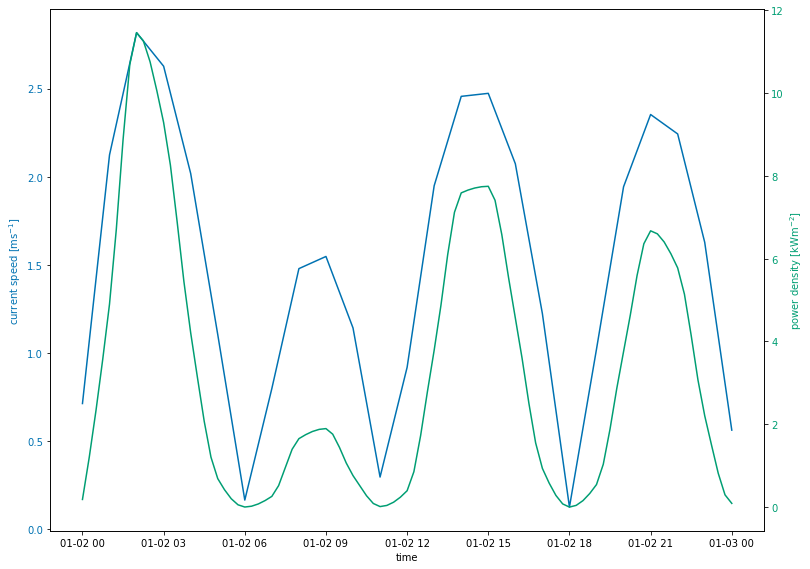

In [81]:
##### stream overlay


lat = 58.7027
latitude_idx1 = np.where(speed.lat.values==lat)[0][0]
latitude_idx2 = np.where(ds_stream.lat.values==lat)[0][0]
lon = -3.0909090
longitude_idx1 = np.where(speed.lon.values==lon)[0][0]
longitude_idx2 = np.where(ds_stream.lon.values==lon)[0][0]

fig,ax1 = plt.subplots(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')

color = '#0072B2'
ax1.plot(speed.time.values[24:49],speed.speed.values[24:49,:,latitude_idx1,longitude_idx1],color=color)
ax1.set_xlabel('time')
ax1.set_ylabel('current speed [ms$\mathdefault{^{-1}}$]',color=color)
ax1.tick_params(axis='y',labelcolor=color)


color = '#009E73'
ax2 = ax1.twinx()
ax2.plot(ds_stream.time.values[:97],ds_stream.pd.values[:97,latitude_idx2,longitude_idx2]/1000,color=color)
ax2.set_ylabel('power density [kWm$\mathdefault{^{-2}}$]',color=color)
ax2.tick_params(axis='y',labelcolor=color)


# plt.savefig('figures/for-report/pdspeed-pentlandfirth.png')


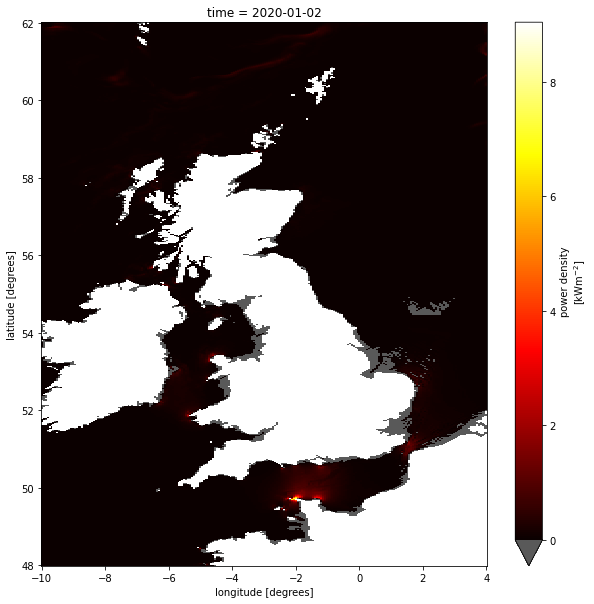

In [90]:
ds_stream.pd.values = ds_stream.pd.values/1000
ds_stream['pd'] = ds_stream.pd.assign_attrs(units='kWm$\mathdefault{^{-2}}$')

cmap = mpl.cm.get_cmap('hot').copy()
cmap.set_under('#595959')

target_time = '2020-01-02T00:00:00.000000000' 
ds_stream.pd.sel(time=target_time,method='nearest').plot(size=10,aspect=1,vmin=0,cmap=cmap)  

# plt.savefig('figures/for-report/stream-pd-map.png')


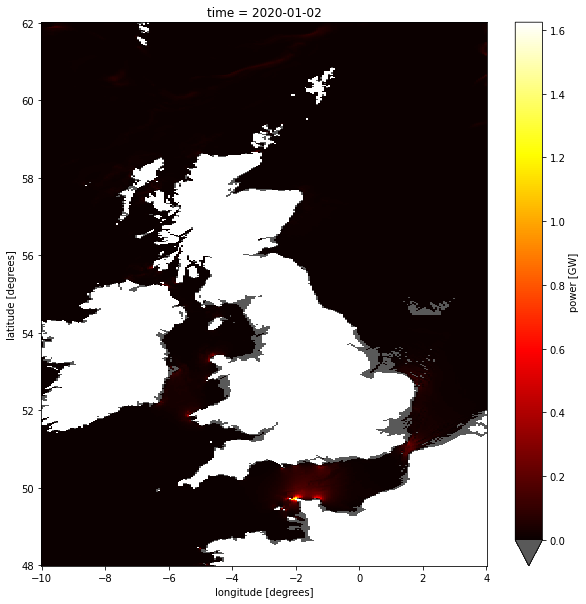

In [94]:
ds_stream_pow.power.values = ds_stream_pow.power.values/1e9
ds_stream_pow['power'] = ds_stream_pow.power.assign_attrs(units='GW')

cmap = mpl.cm.get_cmap('hot').copy()
cmap.set_under('#595959')

target_time = '2020-01-02T00:00:00.000000000' 
ds_stream_pow.power.sel(time=target_time,method='nearest').plot(size=10,aspect=1,vmin=0,cmap=cmap)  

# plt.savefig('figures/for-report/stream-power-map.png')


In [106]:
ds_range_mean = xr.open_dataset('data/processed/range-mean-power3.nc')
ds_stream_mean = xr.open_dataset('data/processed/stream-mean-power3.nc')


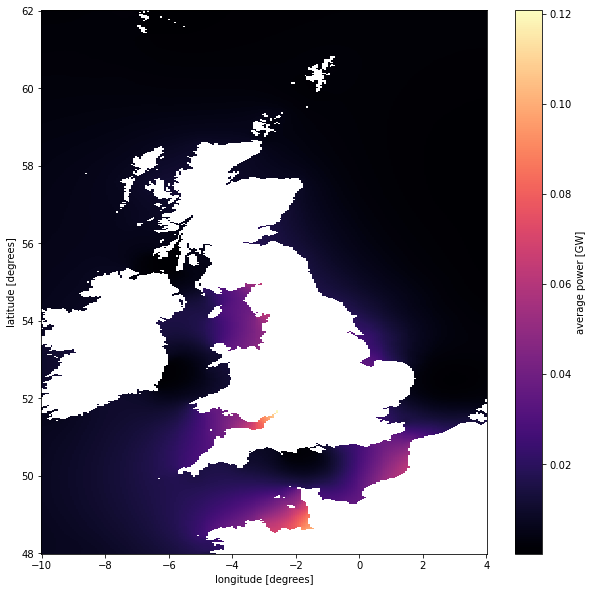

In [101]:
ds_range_mean.power.values = ds_range_mean.power.values/1e9
ds_range_mean['power'] = ds_range_mean.power.assign_attrs(units='GW')
ds_range_mean['power'] = ds_range_mean.power.assign_attrs(long_name='average power')


cmap = mpl.cm.get_cmap('magma').copy()
ds_range_mean.power.plot(size=10,aspect=1,cmap=cmap) 
# plt.savefig('figures/for-report/range-avpower-map.png')

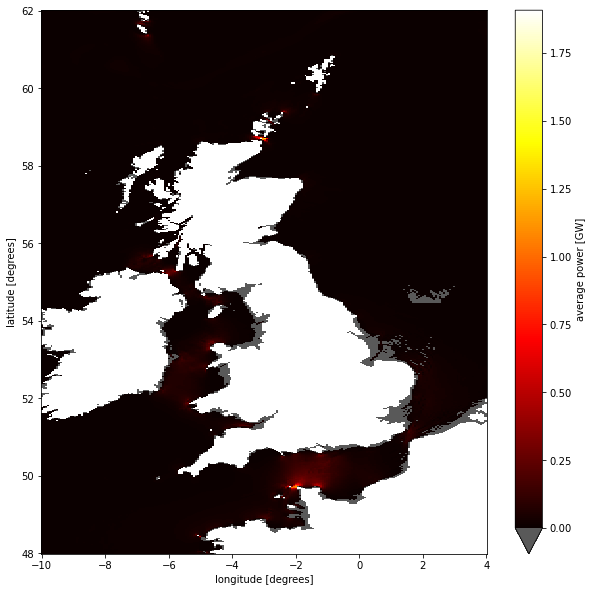

In [107]:
ds_stream_mean.power.values = ds_stream_mean.power.values/1e9
ds_stream_mean['power'] = ds_stream_mean.power.assign_attrs(units='GW')
ds_stream_mean['power'] = ds_stream_mean.power.assign_attrs(long_name='average power')


cmap = mpl.cm.get_cmap('hot').copy()
cmap.set_under('#595959')

ds_stream_mean.power.plot(size=10,aspect=1,vmin=0,cmap=cmap) 
# plt.savefig('figures/for-report/stream-avpower-map.png')

In [3]:
ds = xr.open_dataset('data/processed/range-search-space-3e7.nc')

In [8]:
ds['lat'] = ds.lat.assign_attrs(units='degrees')
ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
ds['lon'] = ds.lon.assign_attrs(units='degrees')
ds['lon'] = ds.lon.assign_attrs(long_name='longitude')

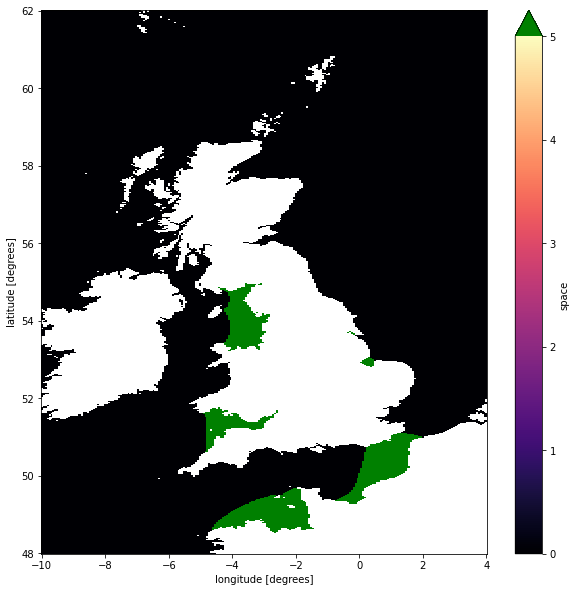

In [11]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('green')
cmap.set_bad('white')

ds.space.plot(size=10,aspect=1,vmax=5,cmap=cmap)  
# plt.savefig('figures/for-report/ga-searchspace-3e7.png')

In [8]:
ds_range = xr.open_dataset('data/processed/range-pd-sync4.nc')
ds_stream = xr.open_dataset('data/processed/stream-pd-int2.nc')

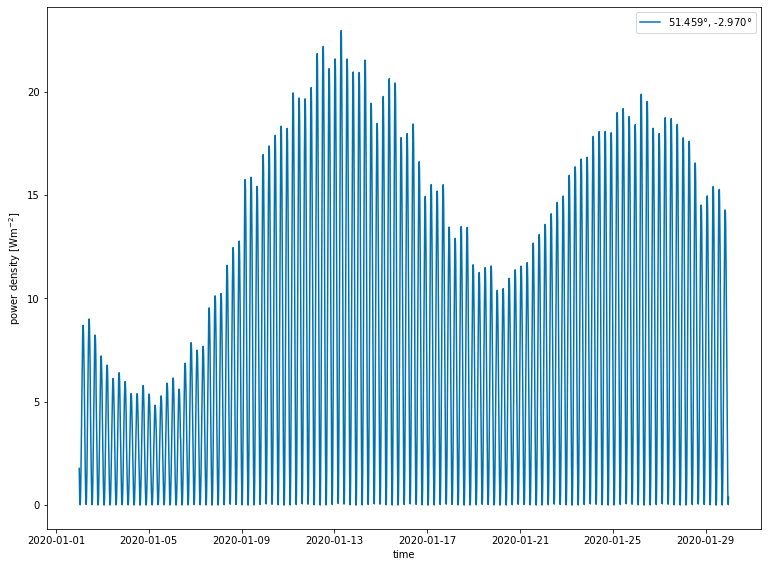

In [9]:
lat = 51.45946
latitude_idx = np.where(ds_range.lat.values==lat)[0][0]
lon = -2.9696970
longitude_idx = np.where(ds_range.lon.values==lon)[0][0]

plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(ds_range.time.values,ds_range.pd.values[:,latitude_idx,longitude_idx],label='51.459$\degree$, -2.970$\degree$')
plt.xlabel('time')
plt.ylabel('power density [Wm$\mathdefault{^{-2}}]$')
plt.legend()
# plt.savefig('figures/for-report/pd-severnestuary.png')

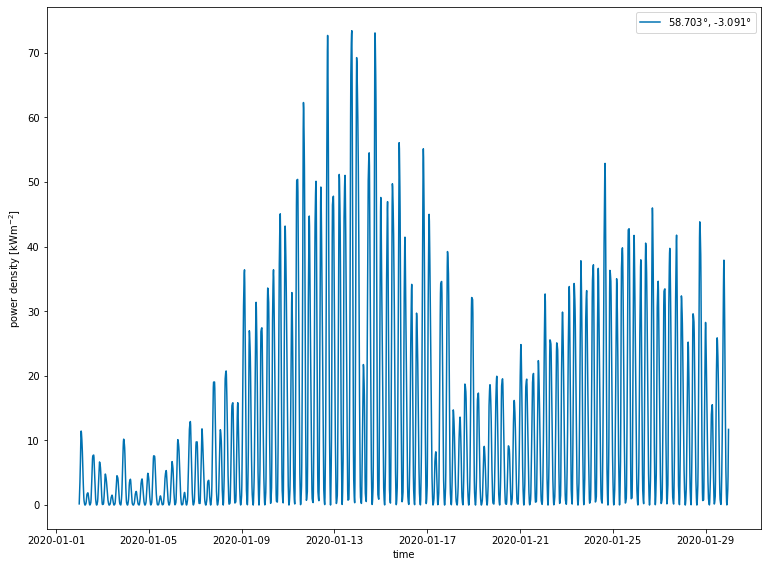

In [10]:
lat = 58.7027
latitude_idx = np.where(ds_stream.lat.values==lat)[0][0]
lon = -3.0909090
longitude_idx = np.where(ds_stream.lon.values==lon)[0][0]

plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(ds_stream.time.values,ds_stream.pd.values[:,latitude_idx,longitude_idx]/1000,label='58.703$\degree$, -3.091$\degree$')
plt.xlabel('time')
plt.ylabel('power density [kWm$\mathdefault{^{-2}}]$')
plt.legend()
# plt.savefig('figures/for-report/pd-pentlandfirth.png')